<table>
    <tr>
        <th><img src="img/rqc.png" href="http://www.rqc.ru/" width="150px"></th>
        <th colspan="3" align=left style="font-weight:normal">
            <p>• Anton Karazeev: [a.karazeev@rqc.ru](mailto:a.karazeev@rqc.ru) or [t.me/akarazeev](t.me/akarazeev)</p>
            <p>• Based on [Introduction to Quantum Computing](http://pyquil.readthedocs.io/en/latest/intro.html)</p>
        </th>
    </tr>
</table>

# От классического бита к кубиту / From Bit to Qubit

## Вероятностные биты как векторные пространства / Probabilistic Bits as Vector Spaces

Возможные результаты измерения бита представим в виде ортонормированных базисных векторов $\overrightarrow{0}$ и $\overrightarrow{1}$. И назовём их **исходами**.

Например, в двумерном пространстве базисные векторы можно представить следующим образом: $\overrightarrow{0} = \begin{pmatrix} 1 \\ 0 \\ \end{pmatrix}$ и $\overrightarrow{1} = \begin{pmatrix} 0 \\ 1 \\ \end{pmatrix}$. Выбор обусловлен следующим:
- Они **нормированы** (их длины равны единице): $(\overrightarrow{0}, \overrightarrow{0}) = \overrightarrow{0}^T \cdot \overrightarrow{0} = \begin{pmatrix} 1 & 0 \\ \end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ \end{pmatrix} = 1 \cdot 1 + 0 \cdot 0 = 1$ и $(\overrightarrow{1}, \overrightarrow{1}) = \overrightarrow{1}^T \cdot \overrightarrow{1} = \begin{pmatrix} 0 & 1 \\ \end{pmatrix} \begin{pmatrix} 0 \\ 1 \\ \end{pmatrix} = 0 \cdot 0 + 1 \cdot 1 = 1$,

- И **ортогональны** (скалярное произведение равно $0$): $(\overrightarrow{1}, \overrightarrow{0}) = (\overrightarrow{0}, \overrightarrow{1}) = \overrightarrow{0}^T \cdot \overrightarrow{1} = \begin{pmatrix} 1 & 0 \\ \end{pmatrix} \begin{pmatrix} 0 \\ 1 \\ \end{pmatrix} = 1 \cdot 0 + 0 \cdot 1 = 0$.

Эти исходы образуют двумерное векторное пространство, которое представляет вероятностный бит: $\overrightarrow{v} = a\cdot\overrightarrow{0} + b\cdot\overrightarrow{1}$, где $a$ и $b$ - вероятности того, что бит принимает значение 0 или 1 соответственно. Очевидно, что $a + b$ должно равнятся $1$.

**Состояние** такой системы может быть представлено двумерным вектором на плоскости:

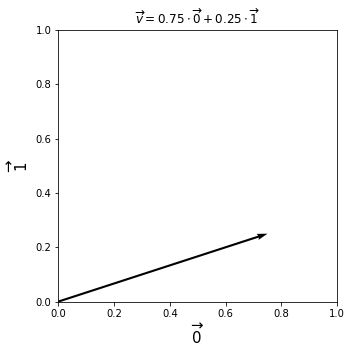

In [7]:
import numpy as np
import matplotlib.pyplot as plt

outcome_0 = np.array([1.0, 0.0])
outcome_1 = np.array([0.0, 1.0])
a = 0.75
b = 0.25

assert a + b == 1, "Sum of probabilities must be equal to 1.0"

prob_bit = a*outcome_0 + b*outcome_1

X, Y = prob_bit

plt.figure(figsize=(5,5))
ax = plt.gca()
ax.quiver(X, Y, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
plt.xlabel('$\overrightarrow{0}$', fontsize=15)
plt.ylabel('$\overrightarrow{1}$', fontsize=15)
plt.title('$\overrightarrow{v} = {a}\cdot\overrightarrow{0} + {b}\cdot\overrightarrow{1}$'.format(0, 1, v='v', a=a, b=b))
plt.draw()
plt.show()

По заданному вектору-состоянию можно найти вероятности исходов $0$ и $1$, если спроецировать $\overrightarrow{v}$ на базисные векторы:
$$Pr(0) = (\overrightarrow{v}, \overrightarrow{0}) = \overrightarrow{v}^T \cdot \overrightarrow{0} = a,$$
$$Pr(1) = (\overrightarrow{v}, \overrightarrow{1}) = \overrightarrow{v}^T \cdot \overrightarrow{1} = b.$$

In [2]:
print("Получаем, что a={}".format(prob_bit.dot(outcome_0)))
print("Получаем, что b={}".format(prob_bit.dot(outcome_1)))

Получаем, что a=0.75
Получаем, что b=0.25


$\ket{v} = \begin{pmatrix} -i \\ 1  \end{pmatrix}, \bra{v} = \begin{pmatrix} +i & 1  \end{pmatrix}$

$(a-i\cdot b)$ -> $(a+i \cdot b)$ - Комплексное сопряжение


$(a+i\cdot b)$ -> $(a-i \cdot b)$ - Комплексное сопряжение

$(-5i)^*=+5i$

## Обозначения Дирака / Dirac notation

$\newcommand{\ket}[1]{\left|{#1}\right\rangle} \newcommand{\bra}[1]{\left\langle{#1}\right|} \newcommand{\braket}[2]{\left\langle{#1}\vert{#2}\right\rangle}$
$\overrightarrow{v} = \ket{v}$ - вектор **кет**

$\overrightarrow{v}^\dagger = \overrightarrow{v}^{*T} = \bra{v}$ - вектор **бра**

$\overrightarrow{u}^\dagger \cdot \overrightarrow{v} = \braket{u}{v}$ - скалярное вроизведение векторов **бра** и **кет**

Можно переписать формулу для измерения вероятности:

$Pr(0) = \braket{v}{0} = a$

$Pr(1) = \braket{v}{1} = b$

Example:
$\begin{pmatrix} +i & 1  \end{pmatrix} \cdot \begin{pmatrix} -i \\ 1  \end{pmatrix} = 1 + 1 = 2$

## Тензорное произведение / [Kronecker product](https://en.wikipedia.org/wiki/Kronecker_product)

$\ket{00} = \ket{0} \otimes \ket{0} = \begin{pmatrix} 1 \\ 0 \\ \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \\ \end{pmatrix} = \begin{pmatrix} 1 \cdot \begin{pmatrix} 1 \\ 0 \\ \end{pmatrix} \\ 0 \cdot \begin{pmatrix} 1 \\ 0 \\ \end{pmatrix} \\ \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \\ \end{pmatrix}$

$\ket{01} = \ket{0} \otimes \ket{1} = \begin{pmatrix} 1 \\ 0 \\ \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \\ \end{pmatrix} = \begin{pmatrix} 1 \cdot \begin{pmatrix} 0 \\ 1 \\ \end{pmatrix} \\ 0 \cdot \begin{pmatrix} 0 \\ 1 \\ \end{pmatrix} \\ \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \\ \end{pmatrix}$

$\ldots$

## Несколько вероятностных бит / Multiple Probabilistic Bits

Рассмотрим на примере двух монеток $u$ и $v$, орёл и решку обозначим за $0$ и $1$.

Запишем состояния:

$\ket{u} = \frac{1}{2} \ket{0_u} + \frac{1}{2} \ket{1_u}$

$\ket{v} = \frac{1}{2} \ket{0_v} + \frac{1}{2} \ket{1_v}$, где $1_u$ обозначает исход $1$ у монетки $u$.

У системы из двух монеток есть 4 варианта исходов: $\left\{ 0_u 0_v, 0_u 1_v, 1_u 0_v, 1_u 1_v \right\}$ - это и есть базис состояний четырёхмерного векторного пространства.

**Комбинированное состояние** системы можно выразить через тензорное произведение: $\ket{uv} = \ket{u} \otimes \ket{v} = \frac{1}{4}\ket{0_u 0_v} + \frac{1}{4}\ket{0_u 1_v} + \frac{1}{4}\ket{1_u 0_v} + \frac{1}{4}\ket{1_u 1_v}$.

Таким образом, **комбинированное пространство** это просто тензорное произведение всех пар базисных векторов меньших пространств.

Можно встретить и такое обозначение: $\otimes_{i=0}^{n-1}\ket{v_i} = \ket{v_0} \otimes \ket{v_1} \otimes \ldots \otimes \ket{v_{n-1}} = \ket{v_0 v_1 \ldots v_{n-1}}$

^-- "классика" --^

v-- квантовая механика начнётся здесь --v

## Кубиты / Qubits

Квантовый бит, который называется **кубитом**, является квантовым аналогом классического бита, у него тоже есть два возможных исхода после измерения.

Кубит тоже может быть представлен в векторном пространстве - только вместо действительных коэффициентов будут комплексные.

**Система** из кубита это двумерное комплексное векторное пространство, а **состояние** кубита - комплексный вектор в этом пространстве.

Задаём пространство исходов: $\left\{ \ket{0}, \ket{1} \right\}$, тогда состояние произвольного кубита запишется следующим образом: $\alpha \ket{0} + \beta \ket{1}$. Так как коэффициенты могут быть мнимыми, то они не могут интерпретироваться как вероятности соответствующих исходов. Вместо этого перепишем формулы для вычисления вероятностей:
$$Pr(0) = \left\vert\braket{v}{0}\right\vert^2 = \left\vert\alpha\right\vert^2 = \alpha \cdot \alpha^* \in R,$$
$$Pr(1) = \left\vert\braket{v}{1}\right\vert^2 = \left\vert\beta\right\vert^2, \alpha \in C$$
$$\left\vert\alpha\right\vert^2 + \left\vert\beta\right\vert^2 = 1.$$

$|\begin{pmatrix} \alpha^* & \beta^* \\ \end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ \end{pmatrix}|^2 = |\alpha^*|^2$

$a+ib$

Длина: $\sqrt{a^2 + b^2}$

# Добавить про Собственные значения/векторы матриц

## Теория  про кубиты

Как и бит, кубит допускает два собственных состояния, обозначаемых |0> и |1> (обозначения Дирака), но при этом может находиться и в их суперпозиции, то есть в состоянии A|0> + B|1>, где B — комплексные числа, удовлетворяющие условию $|A|^{2}+|B|^{2}=1$.

При любом измерении состояния кубита он случайно переходит в одно из своих собственных состояний. Вероятности перехода в эти состояния равны соответственно $|A|^{2}$ и $|B|^{2}$, то есть косвенно, по наблюдениям за множеством кубитов, мы всё-таки можем судить об исходном состоянии.

$\ket{v}= \alpha \ket{0} + \beta \ket{1}$

$(1+\alpha * i,  4+\beta * i)$

## Сфера Блоха / Bloch Sphere

Этот переход к комплескным векторам означает слудующее - вместо того, чтобы представлять вектор состояния на плоскости, мы будем представлять его на сфере.

<img src=img/02_bloch.png width=500px>

<p style="text-align: center;"> [Source](https://www.researchgate.net/publication/236883187_Quantum_Search_Algorithms_Quantum_Wireless_and_a_Low-Complexity_Maximum_Likelihood_Iterative_Quantum_Multi-User_Detector_Design) </p>

Состояние из нескольких кубит может быть точно так же представлено, если взять тензорные произведения пространств и состояний. Таким образом, система из $n$ кубит будет иметь $2^n$ возможных состояний.

## Операции над кубитами / Qubits Operations

### На примере IBM Q Experience [*Composer*](https://quantumexperience.ng.bluemix.net/qx/editor)

<img src="img/05_composer.jpg" width="300px">

Так выглядит простейшая квантовая цепь, состоящая из гейтов Адамара ($H$) и $CNOT$. В конце стоят блоки, которые отвечают за измерение состояния кубит в базисе $\sigma^z$.

<img src="img/06_simulation.jpg" width="600px">

Результаты симуляции.


Начнём с простых операторов: тождественный оператор $I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$ и NOT оператор $X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$.

Квантовые состояния могут быть представлены как комплексные векторы на сфере Блоха, а квантовые операции как матрицы со следующими свойствами:
- Обратимость ($U^{-1} = U^\dagger = U^{*T}$)
- Если их применить к вектору, лежащему на сфере Блоха, то результирующий вектор тоже будет лежать на сфере Блоха

Матрицы, которые удовлетворяют указанным свойствам, называются **унитарными**. Операция == Матрица == **Гейт**.

Рассмотрим действие тождественного оператора:
$$I \ket{0} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \ket{0},$$
$$I \ket{1} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \ket{1}.$$

Действие оператора NOT:
$$X \ket{0} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \ket{1},$$
$$X \ket{1} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \ket{0}.$$

## Операторы Паули / Pauli Operators

$X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$, $Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$, $Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$.

$\sigma_1, \sigma_2, \sigma_3$

Матрицы Паули осуществляют поворот на 180 градусов вектора, который представляет состояние кубита на сфере Блоха. Например, гейт $X$ осуществляет поворот вокруг оси $x$ на 180 градусов

## Операции над несколькими кубитами / Multi-Qubit Operations

Наиболее распространённым примером служит гейт Controlled-NOT (CNOT), который применяется к двум кубитам: $CNOT = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$

Состояние второго кубита меняется на противоположное тогда и только тогда, когда состояние первого кубита $\ket{1}$.

Другой пример двухкубитного гейта: $SWAP = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix}$, который меняет состояния $\ket{10}$ и $\ket{01}$ местами.

## Гейт Адамара / Hadamard Gate

$H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$:

$H\ket{0} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} \left(\ket{0} + \ket{1}\right) = \ket{+}$,

$H\ket{1} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -1 \end{pmatrix} = \frac{1}{\sqrt{2}} \left(\ket{0} - \ket{1}\right) = \ket{-}$.

Можно видеть, что оба вектора таких состояний лежат на "экваторе" сферы Блоха. Вероятности обнаружить $0$ или $1$ после измерения одинаковы и равны $\frac{1}{2}$.

Таким образом, кубит в одном из таких состояний представляет монетку, которая равновероятно может упасть на орла или решку.

# Иерархия: высокоуровневый язык программирования -> низкоуровневый компилятор

<img src='img/07_hierarchy.jpg'>
<p style="text-align: center;"> [Source](https://www.nature.com/articles/nature18648) </p>